#Справочная информация

Руководство TensorFlow

https://www.tensorflow.org/guide/tensor?hl=ru

TensorFlow для начинающих. Часть 1: общие сведения, установка библиотеки

https://habr.com/ru/company/ruvds/blog/450314/

Учебное пособие по TensorFlow: 10 минутное практическое занятие по TensorFlow для начинающих [перевод] (версия 1.0.)

https://habr.com/ru/post/465745/


https://slideplayer.com/slide/12687069/

#Deep Learning Software: TensorFlow

# NumPy совместимость

Работа с массивами в TensorFlow хорошо совместива NumPy `ndarray` :

* TensorFlow операции автоматически конвертируют NumPy массивы в тензоры.
* NumPy операции автоматически конвертируют Tensors в NumPy массивы.

In [1]:
import numpy as np

x = np.array(1)
print(x.ndim)
y = np.array([1, 2, 3])
print(y.ndim)
z = np.array([[1, 2, 3], [4,5,6]])
print(z.ndim)

0
1
2


In [2]:
y

array([1, 2, 3])

In [3]:
z

array([[1, 2, 3],
       [4, 5, 6]])

In [4]:
type(z)

numpy.ndarray

In [5]:
x.shape

()

In [6]:
y.shape

(3,)

In [7]:
z.shape

(2, 3)

In [8]:
z.shape[0] # axis = 0 - строки

2

In [9]:
z.shape[1] # axis = 1 - столбцы

3

In [10]:
z.shape[-1] # axis = - 1 - последняя ось

3

In [11]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf

In [12]:
# из numpy в тензор:
#tf.convert_to_tensor(np.array)
import tensorflow.compat.v1 as tf
x_t = tf.convert_to_tensor(x)
y_t = tf.convert_to_tensor(y)
z_t = tf.convert_to_tensor(z)
print(x_t, '\n', y_t, '\n', z_t)

tf.Tensor(1, shape=(), dtype=int64) 
 tf.Tensor([1 2 3], shape=(3,), dtype=int64) 
 tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int64)


In [13]:
type(x_t)

tensorflow.python.framework.ops.EagerTensor

In [14]:
import numpy as np
ndarray = np.ones([3, 3]) # создаем единиц 3х3

print("TensorFlow -> numpy ")
tensor = tf.multiply(ndarray, 42) # умножаем на 42
print(tensor)


print("NumPy -> Tensors")
print(np.add(tensor, 1)) # добавляем единицу к каждому элементу

print(".numpy() метод мгновенно конвертирует тензор в numpy массив")
print(tensor.numpy())



TensorFlow -> numpy 
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
NumPy -> Tensors
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
.numpy() метод мгновенно конвертирует тензор в numpy массив
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


# Тензоры

In [15]:
print(tf.add(1, 2)) # сложение
print(tf.add([1, 2], [3, 4])) # сложить по элементам
print(tf.square(5)) # возведение в квадрат
print(tf.reduce_sum([[1, 2, 3],[4,5,6]], axis = None)) # сложение всех элементов
print(tf.reduce_sum([[1, 2, 3],[4,5,6]], axis = 1)) # сложение всех элементов по столбцам
print(tf.reduce_sum([[1, 2, 3],[4,5,6]], axis = 0)) # сложение всех элементов по строкам
print(tf.reduce_sum([[1, 2, 3],[4,5,6]], axis = -1)) # сложение всех элементов по последней оси

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(21, shape=(), dtype=int32)
tf.Tensor([ 6 15], shape=(2,), dtype=int32)
tf.Tensor([5 7 9], shape=(3,), dtype=int32)
tf.Tensor([ 6 15], shape=(2,), dtype=int32)


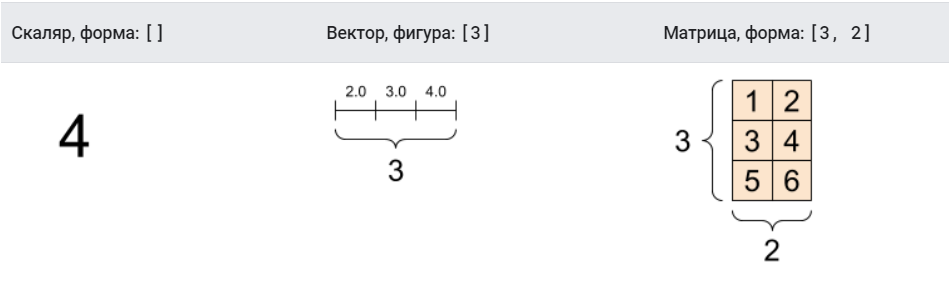

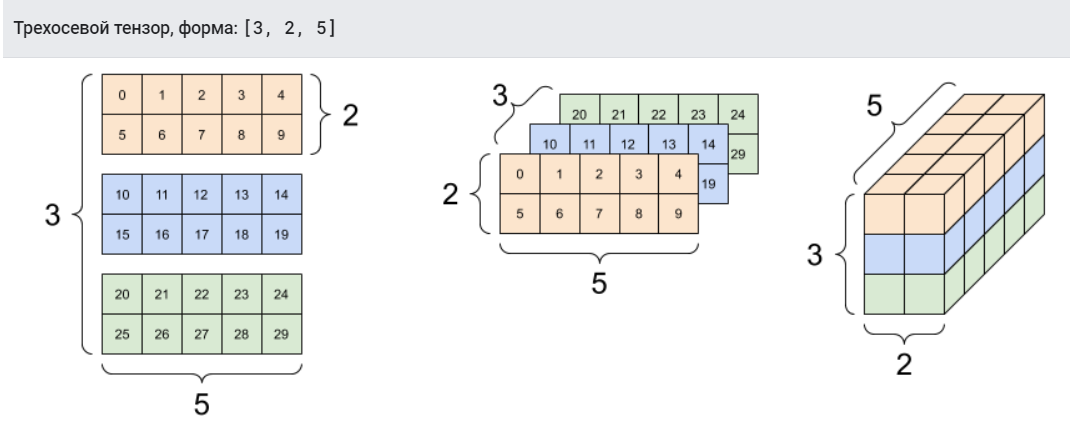

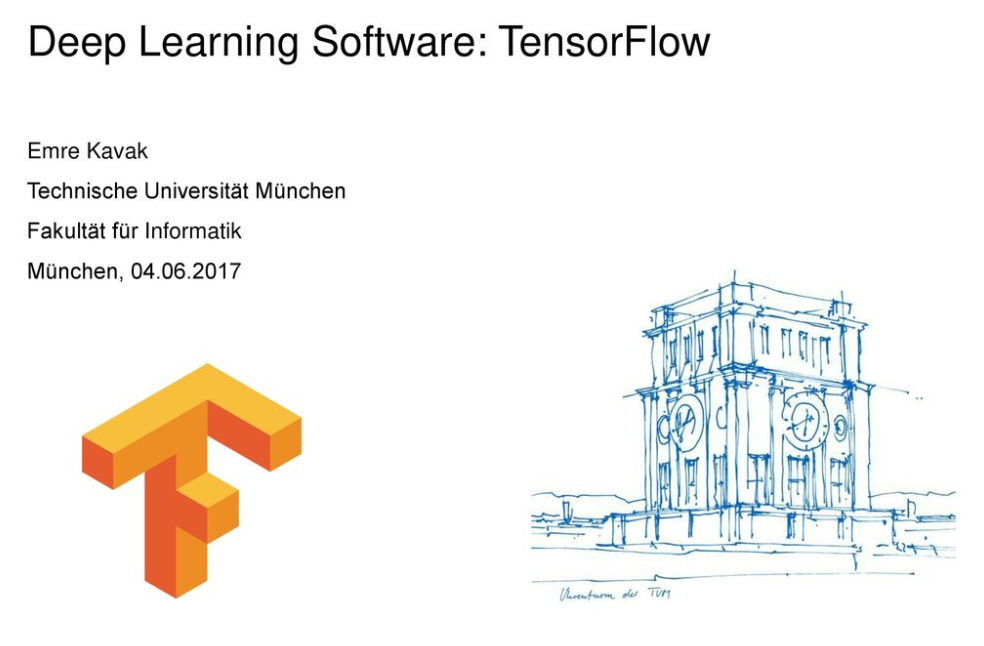

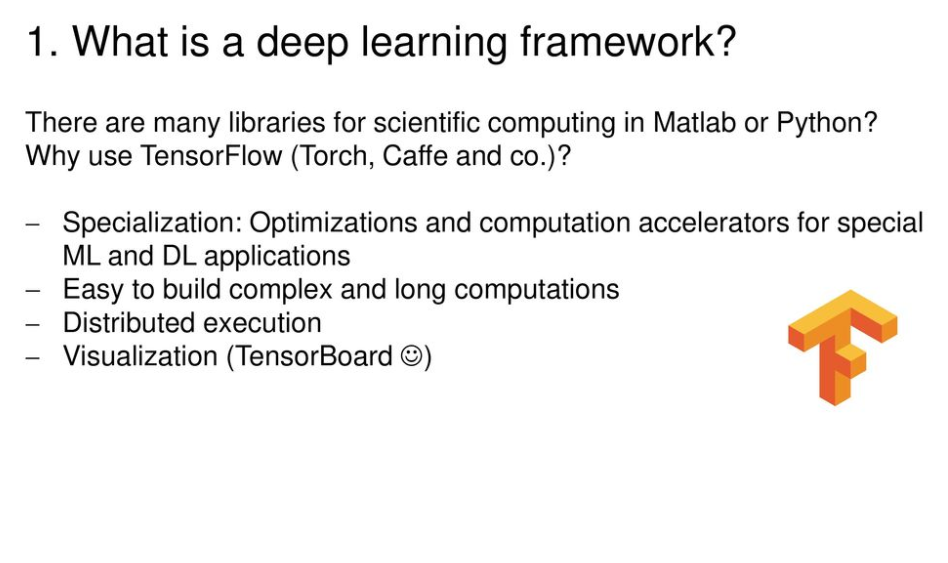

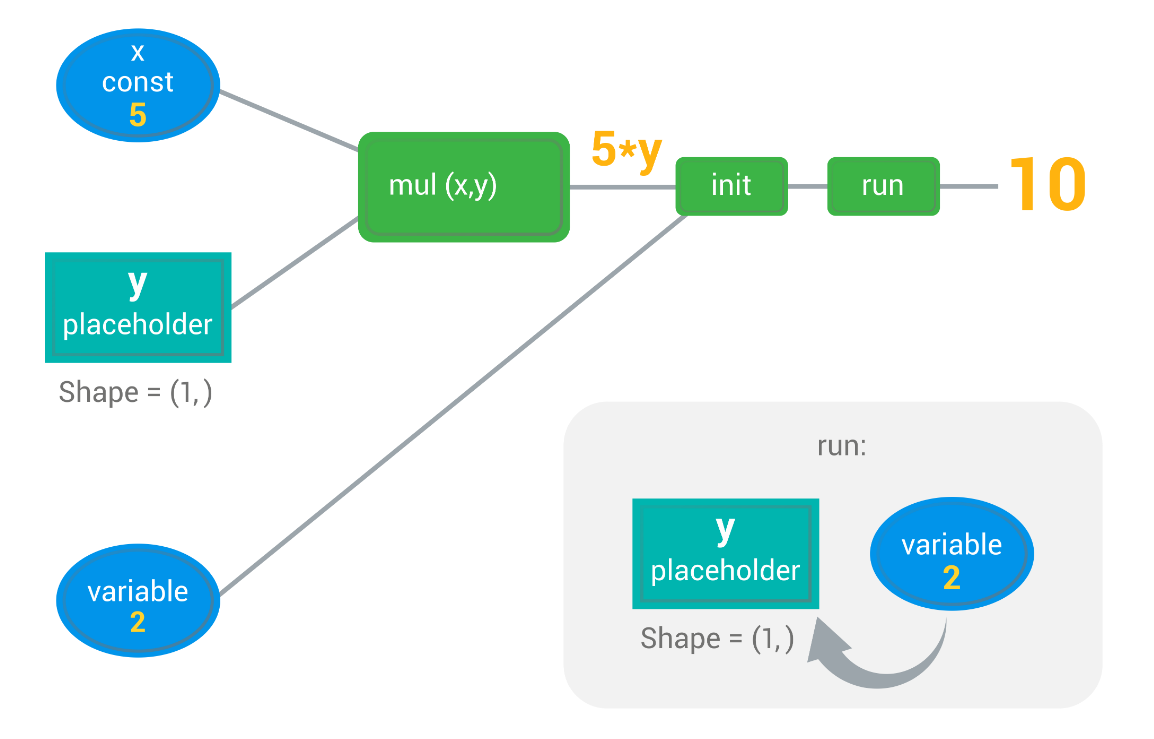

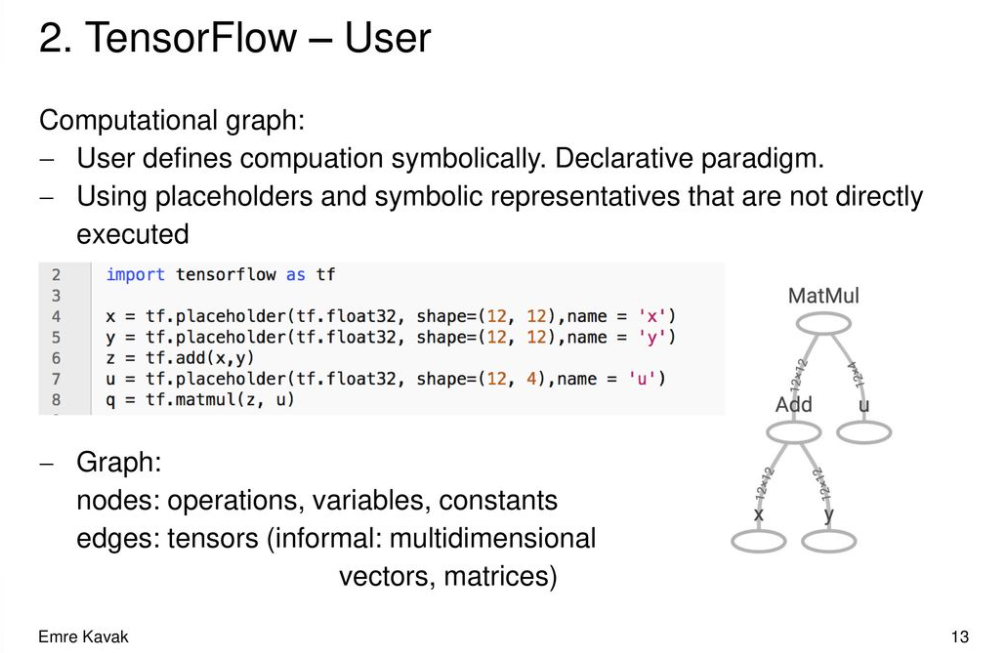

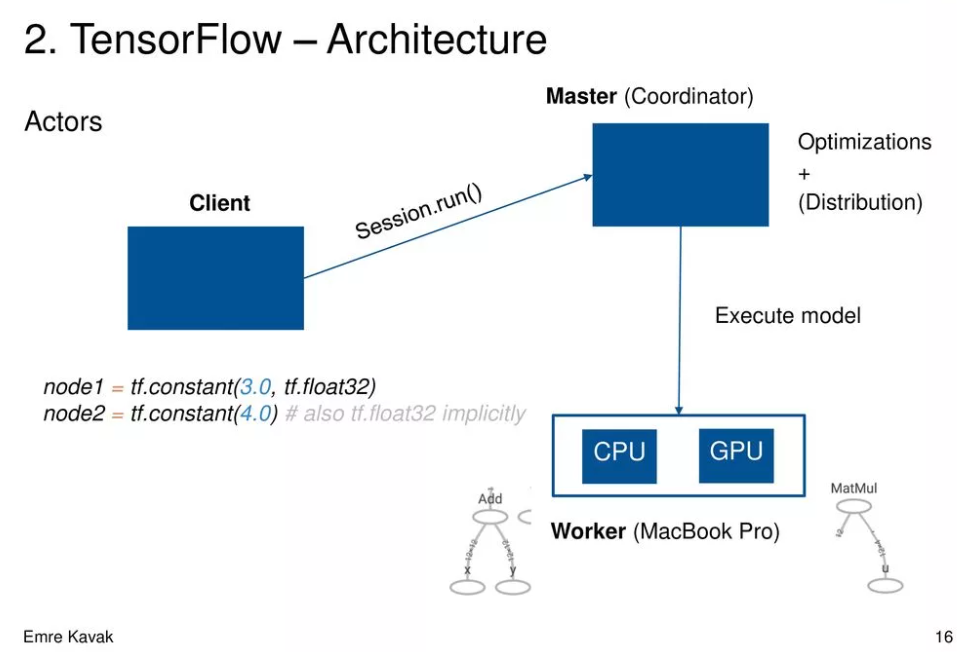

# 1	Hello, TensorFlow!
This experiment introduces the function of sessions by outputting "Hello, TensorFlow!".

1.1.2	Objectives of the Experiment  
	Understand the definition of sessions.  
	Understand how to create a session.  

1.1.3	Experiment Content
Two data flow mechanisms are involved in the interaction between a session and a graph.
Feed mechanism: Transmit data into the graph by placeholders.
Fetch mechanism: Retrieve the result of an operation in the graph.
This experiment introduces the function of sessions by creating a session.
Create a session and output "Hello, TensorFlow!" in the session.

# 1.2	Experimental Process

In [16]:
#1.2.1	Setting Encoding Declarations
# -*- coding: utf-8 -*-
#1.2.2	Importing a Module
import tensorflow as tf

In [17]:
tf.__version__

'2.17.1'

compat - > совместить

In [18]:
import tensorflow.compat.v1 as tf

Константы создаются с использованием функции:

**constant(value, dtype=None, shape=None, name='Const')**

* value - постоянное значение, которое будет использоваться при дальнейших
вычислениях
* dtype - параметр для указания типа данных
(например, float32/64, int8/16)
* shape -  параметр для указания размера массива данных
* name - параметр для определения имени тензора

In [19]:
#1.2.3	Defining constants
hello = tf.constant('Hello, TensorFlow!')  # Define a constant
hello

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, TensorFlow!'>

In [20]:
z = tf.constant(5.2, dtype=tf.float32)
z

<tf.Tensor: shape=(), dtype=float32, numpy=5.2>

In [21]:
n = tf.constant(5, name="x", dtype=tf.int64)
n

<tf.Tensor: shape=(), dtype=int64, numpy=5>

In [22]:
d = tf.constant(5, name="x")
d

<tf.Tensor: shape=(), dtype=int32, numpy=5>

# Запуск сессии

The TensorFlow 2.0 has enabled eager execution by default. At the starting of algorithm, you need to use tf.compat.v1.disable_eager_execution() to disable eager execution.

TensorFlow eager execution —— это императивная программная среда, которая вычисляет операции немедленно, без построения графов: операции возвращают конкретные значения вместо построения вычислительного графа для последующего запуска. Это облегчает начало работы с TensorFlow и отладкой моделей, а также шаблонный код.

Подробнее об Eager execution (мгновенное исполнение)
https://www.tensorflow.org/guide/eager?hl=ru


In [23]:
tf.compat.v1.disable_eager_execution() # Отключаем мгновенный вывод (активное выполнение) для работы в сессии
const = tf.constant(1.0)
# Первый способ запуска сессии
with tf.Session() as sess:
    output_1 = sess.run(const) # Загружаем константу в граф, через сессию и запускаем
    print(output_1)

1.0


In [24]:
#tf.compat.v1.disable_eager_execution()
hello = tf.constant('Hello, TensorFlow!')
with tf.Session() as sess:
    output_2 = sess.run(hello) # Загружаем константу в граф, через сессию и запускаем
    print(output_2)

b'Hello, TensorFlow!'


In [25]:
type(output_2)

bytes

In [26]:
output_2.decode()

'Hello, TensorFlow!'

In [27]:
# Второй способ запуска сессии
#1.2.4	Creating a Session
hello = tf.constant('Hello, TensorFlow!')
tf.disable_eager_execution() # need to disable eager in TF2.x
sess = tf.Session()                            #Create a session.
print (sess.run(hello))                        #Run the command session.run to get the result.
#1.2.5	Closing the Session
sess.close()                                     #Close the session.

b'Hello, TensorFlow!'


Пример вычисления линейной функции y=a*x+b:

In [28]:
#import tensorflow.compat.v1 as tf
x = tf.constant(-2.0, name="x", dtype=tf.float32)
a = tf.constant(5.0, name="a", dtype=tf.float32)
b = tf.constant(13.0, name="b", dtype=tf.float32)
y = tf.Variable(tf.add(tf.multiply(a, x), b))
init = tf.global_variables_initializer()

В отличие от констант переменные могут менять свое содержимое. Однако переменные в TensorFlow должны быть инициализированы в отдельной операции инициализации. TensorFlow предоставляет механизм для инициализации всех переменных: tf.global_variables_initializer()

In [29]:
y

<tf.Variable 'Variable:0' shape=() dtype=float32>

In [30]:
with tf.Session() as session:
  session.run(init)
  print(session.run(y))

3.0


1.3	Instance Description
tf.constant defines a constant. The content after hello can only be returned by the session.run command.


# 2	Session

2.1	Introduction to the Experiment  
2.1.1	About the Experiment  
This experiment introduces the function of sessions by enabling a session using the with session syntax.  
2.1.2	Objectives of the Experiment  
	Understand the definition of sessions.
	Understand how to use the withsession syntax to create a session.  
2.1.3	Experiment Content  
The syntax withsession is the most commonly used one for enabling a session. It adopts the with syntax in Python which allows a session to close automatically upon termination of a program without requiring the close command.  

In [31]:
#2.2	Experimental Process
#2.2.1	Setting Encoding Declarations
# -*- coding: utf-8 -*-
#2.2.2	Importing a Module
import tensorflow.compat.v1 as tf
#2.2.3	Defining Constants
a = tf.constant(3)                     # Defining constant 3
b = tf.constant(4)                     # Defining constant 4

In [32]:
#2.2.4	Creating a Session
with tf.Session() as sess:           # Create a session.
    print("Add:  %i" % sess.run(a+b))     # Calculate and output the sum of the two constants

    print ("Multiply:  %f" % sess.run(a*b))     # Calculate and output the product of the two constants.

Add:  7
Multiply:  12.000000


2.3	Instance Description
Use the withsession syntax to create a session. Calculate and output the sum and product of two constants (3 and 4).

# 3	Matrix Multiplication

3.1	Introduction to the Experiment  
3.1.1	About the Experiment  
This experiment introduces the tensor of TensorFlow to help you understand the use of matrix multiplication functions.  
3.1.2	Objectives of the Experiment  
	Understand the tensor of TensorFlow.  
	Understand how to use TensorFlow to multiply matrixes.  
3.1.3	Experiment Content  
In TensorFlow, you can use the tf.matmul() command to multiply matrixes. However, it cannot be used to multiply a matrix by a vector. This experiment introduces the matrix multiplication of TensorFlow.  

In [33]:
# Build a dataflow graph.
c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])
e = tf.matmul(c, d)

print(e)

Tensor("MatMul:0", shape=(2, 2), dtype=float32)


In [34]:
import tensorflow as tf
print(tf.__version__)

# Construct a `Session` to execute the graph.
with tf.compat.v1.Session() as sess:

  # Build a dataflow graph.
  c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
  d = tf.constant([[1.0, 1.0], [0.0, 1.0]])
  e = tf.matmul(c, d)
  print('1-я матрица\n', sess.run(c))
  print('2-я матрица\n', sess.run(d))
  # Execute the graph and store the value that `e` represents in `result`.
  result = sess.run(e)
  print('Прооизведение матриц\n', result)

2.17.1
1-я матрица
 [[1. 2.]
 [3. 4.]]
2-я матрица
 [[1. 1.]
 [0. 1.]]
Прооизведение матриц
 [[1. 3.]
 [3. 7.]]


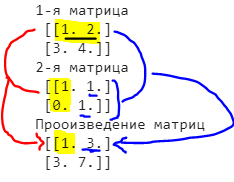

Произведение матриц
https://stepik.org/lesson/307524/step/6?unit=289613



In [35]:
#3.2	Experimental Process
#3.2.1	Setting Encoding Declarations
# -*- coding: utf-8 -*-
#3.2.2	Importing a Module
#import tensorflow as tf
import tensorflow.compat.v1 as tf
#3.2.3	Starting a TensorFlow Default Session
#Tensorflow default session.
sess = tf.InteractiveSession()
#3.2.4	Creating Matrix Variables
#Create two matrix variables w1 and w2.
#tf.random_normal(shape,
#                 mean=0.0,
#                 stddev=1.0,
#                 dtype=dtypes.float32,
#                 seed=None,
#                 name=None)
#A random normal distribution is generated.
#shape stands for the matrix dimension. For example,
#tf.random_normal([2,3],mean=1.0, stddev=1.0) is a matrix of two rows and three columns.
#mean stands for an average. Its default value is 0.0. stddev stands for standard deviation. Its default value is 1.0.
#seed stands for random seed. Its default value is None.
w1 = tf.Variable(tf.random_normal([2,3],mean=1.0, stddev=1.0))
w2 = tf.Variable(tf.random_normal([3,1],mean=1.0, stddev=1.0))
#3.2.5	Defining a Constant Matrix
#Define a two-dimension constant matrix (not a one-dimensional array).
x = tf.constant([[0.7, 0.9]])
#3.2.6	Initializing Global Variables
#Initialize global variables. This step initializes variables w1 and w2 only as these two variables have not been initialized (tensors of them have been defined in previous steps).
tf.global_variables_initializer().run()
#3.2.7	Matrix Multiplication
#Multiply matrixes a= x*w1 For information about matrix multiplication, see linear algebra.
a = tf.matmul(x ,w1)
#Multiply matrixes y=a*w2
y = tf.matmul(a, w2)
#The output computation result is a two-dimension matrix of one row and one column.
print(y.eval())

[[9.56567]]


3.3	Instance Description  
3.3.1	Instance Description  
Use the withsession syntax to create a session and multiply matrixes in the session.  
